# 3.15.x Final Assignment

### Assignment Instructions

#### Part 1   |   Standard Difficulty Level

In this first part, you will be working with a datasets containing information of over 20k Software Professionals with different variables like: 

- the `Rating` of the company given by the employee,
- the `Company Name`, 
- the `Job Title` of the employee, 
- the employee `Salary` (in Indian Rupee ₹), 
- the number of `Salaries Reported`, 
- the `Location` of the company, 
- the `Employment Status` and
- the category of the `Job Roles` 

The dataset name is `Software Professionals Salary.csv` and you will find it in the `data` folder of this repository. At [this link](https://www.kaggle.com/datasets/iamsouravbanerjee/software-professional-salaries-2022?search=salary) you can find the source of the data (Kaggle) as well as more information on its composition. 

**Setup:** Import the necessary libraries and load the .csv file to a DataFrame named `sps`. Check that all columns have the correct data type. 

In [1]:
import numpy as np
import pandas as pd
import requests as rqs
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = pd.read_csv ("Software Professionals Salary.csv")

In [4]:
sps = pd.DataFrame(file)

In [ ]:
sps.head

In [ ]:
sps.dtypes

1. What is the shape (rows, cols) of the `sps` DataFrame? 

In [7]:
sps.shape

(22770, 8)

In [ ]:
sps.info

2. How many unique `Job Roles` are there in the dataset? 

In [ ]:
sps["Job Roles"].unique()

In [10]:
sps["Job Roles"].nunique()

11

3. How many unique `Job Title` are there for the "Python" `Job Role`? 

In [11]:
python_jobs_df = sps[sps['Job Roles'] == 'Python']

In [12]:
python_jobs_df['Job Title'].nunique()

102

4. Of the `Company Name`s that are listed in the DataFrame, **how many** have a "Python" `Job Role` with a `Job Title` containing the **substring** "Analyst"?

In [13]:
filtered_df = sps[(sps['Job Roles'] == 'Python') & (sps['Job Title'].str.contains('Analyst'))]

In [14]:
filtered_df['Company Name'].nunique()

3

5. Which `Company Name` has the highest number of `Salaries Reported` (across all `Job Title`s)?

In [15]:
grouped_df = sps.groupby('Company Name')['Salaries Reported'].sum().reset_index()

In [16]:
max_salary_row = grouped_df[grouped_df['Salaries Reported'] == grouped_df['Salaries Reported'].max()]

In [17]:
company_with_highest_salaries = max_salary_row['Company Name'].values[0]

In [18]:
company_with_highest_salaries

'Amazon'

6. Given the `Company Name` you found at the previous question, how many `Location`s is this company present in? 

In [19]:
amazon_df = sps[sps['Company Name']== company_with_highest_salaries]

In [20]:
amazon_df['Location'].unique()

array(['Bangalore', 'Hyderabad', 'New Delhi', 'Chennai', 'Jaipur',
       'Kolkata', 'Madhya Pradesh', 'Mumbai', 'Pune'], dtype=object)

In [21]:
amazon_df['Location'].nunique()

9

7. As you may have noticed, the `Salary` is reported in Indian Rupees (ISO code: INR). Using the [Open Access Endpoint](https://www.exchangerate-api.com/docs/free) (no API Key required) of the ExchangeRate-API service, create a new column named `Salary USD` containing the salary-equivalent in USD and round the result to zero decimals. What is the conversion rate between USD-INR at the time of your execution? *Note: of course, this result will change in time*

In [22]:
# Make a GET request to the ExchangeRate-API endpoint
response = rqs.get('https://open.er-api.com/v6/latest/INR')


In [23]:
# Parse the response as JSON
data = response.json()

In [24]:
dataf= pd.DataFrame(data)

In [25]:
# Extract the conversion rate from the response data
conversion_rate_USD = dataf['rates']['USD']
date_conversion_rate_USD = dataf['time_last_update_utc']['USD']

In [26]:
# Print the conversion rate
print("Conversion rate between USD and INR:", conversion_rate_USD)
print("Date of last update conversion rate:", date_conversion_rate_USD)

Conversion rate between USD and INR: 0.0122
Date of last update conversion rate: Tue, 04 Jul 2023 00:02:32 +0000


In [27]:
# Multiply the Salary column by the conversion rate to get the equivalent in USD
sps['Salary USD'] = sps['Salary'] * conversion_rate_USD

# Round the result to zero decimals
sps['Salary USD'] = sps['Salary USD'].round(decimals=0)

In [28]:
sps

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles,Salary USD
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android,4880.0
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android,4880.0
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android,12200.0
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android,3660.0
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android,7320.0
...,...,...,...,...,...,...,...,...,...
22765,4.7,Expert Solutions,Web Developer,200000,1,Bangalore,Full Time,Web,2440.0
22766,4.0,Nextgen Innovation Labs,Web Developer,300000,1,Bangalore,Full Time,Web,3660.0
22767,4.1,Fresher,Full Stack Web Developer,192000,13,Bangalore,Full Time,Web,2342.0
22768,4.1,Accenture,Full Stack Web Developer,300000,7,Bangalore,Full Time,Web,3660.0


8. What is the average `Salary USD` for the "Python" `Job Role`? 

In [29]:
python_jobs_df = sps[sps['Job Roles'] == 'Python']

In [30]:
python_jobs_df['Salary USD'].mean().round(decimals=4)

5929.5037

9. Which `Company Name` has the highest **average** `Salary EUR` across all `Job Title`s? 

In [31]:
# Extract the conversion rate from the response data
conversion_rate_EUR = dataf['rates']['EUR']
date_conversion_rate_EUR = dataf['time_last_update_utc']['EUR']

In [32]:
# Print the conversion rate
print("Conversion rate between EUR and INR:", conversion_rate_EUR)
print("Date of last update conversion rate:", date_conversion_rate_EUR)

Conversion rate between EUR and INR: 0.0112
Date of last update conversion rate: Tue, 04 Jul 2023 00:02:32 +0000


In [33]:
# Multiply the Salary column by the conversion rate to get the equivalent in EUR
sps['Salary EUR'] = sps['Salary'] * conversion_rate_EUR

# Round the result to zero decimals
sps['Salary EUR'] = sps['Salary EUR'].round(decimals=0)

In [34]:
sps

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles,Salary USD,Salary EUR
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android,4880.0,4480.0
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android,4880.0,4480.0
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android,12200.0,11200.0
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android,3660.0,3360.0
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android,7320.0,6720.0
...,...,...,...,...,...,...,...,...,...,...
22765,4.7,Expert Solutions,Web Developer,200000,1,Bangalore,Full Time,Web,2440.0,2240.0
22766,4.0,Nextgen Innovation Labs,Web Developer,300000,1,Bangalore,Full Time,Web,3660.0,3360.0
22767,4.1,Fresher,Full Stack Web Developer,192000,13,Bangalore,Full Time,Web,2342.0,2150.0
22768,4.1,Accenture,Full Stack Web Developer,300000,7,Bangalore,Full Time,Web,3660.0,3360.0


In [35]:
grouped_df = sps.groupby('Company Name')['Salary EUR'].mean().round(decimals=4).reset_index()
max_salary_row = grouped_df[grouped_df['Salary EUR'] == grouped_df['Salary EUR'].max()]
company_with_highest_salaries = max_salary_row['Company Name'].values[0]

In [36]:
company_with_highest_salaries

'Thapar University'

10. Create a Plot that shows the **relationship** between the average `Salary EUR` and the average `Rating` for each `Company Name`. Do you see any anomaly in the plot? Which is the `Company Name` that is causing this oddity?

In [37]:
# Calculate the average Salary EUR and Rating for each Company Name
averages_df = sps.groupby('Company Name').agg({'Salary EUR': 'mean', 'Rating': 'mean'}).reset_index()


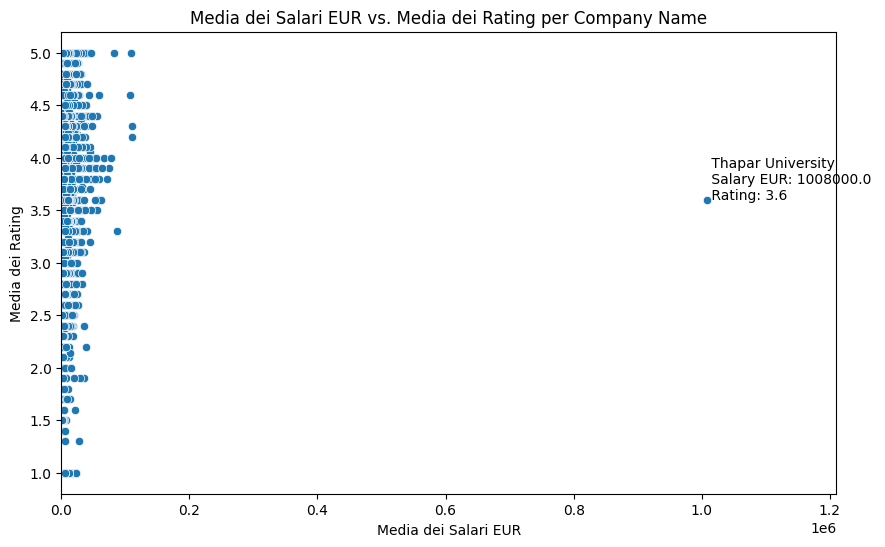

In [38]:
# Creo il grafico utilizzando Seaborn
plt.figure(figsize=(10, 6))  # Imposta la dimensione del grafico
plt.xlim(0, 1210000)

# Disegno il grafico a dispersione utilizzando Seaborn
sns.scatterplot(data=averages_df, x='Salary EUR', y='Rating')

# Imposto il titolo del grafico e le etichette degli assi
plt.title('Media dei Salari EUR vs. Media dei Rating per Company Name')
plt.xlabel('Media dei Salari EUR')
plt.ylabel('Media dei Rating')

# Aggiungo le etichette dei punti al grafico utilizzando Matplotlib
for i in range(len(averages_df)):
    if averages_df['Salary EUR'][i]>600000:
        
        labels= f" {averages_df['Company Name'][i]} \n Salary EUR: {averages_df['Salary EUR'][i]} \n Rating: {averages_df['Rating'][i]} "
        plt.text(averages_df['Salary EUR'][i], averages_df['Rating'][i], labels)
    

# Mostra il grafico
plt.show()